# Predicting Compressive Strength of Concrete


Team ID PTID-CDS-NOV-221422  
Team members:JOE K PULIKOTTIL, 
              AMALJITH C.A, 
              AKSHAY SHA I.S

## Problem Statement

Task 1:- Prepare a complete data analysis report on the concrete data.

Task 2:- Create a machine learning model which can predict the future strength of a concrete mix, based on its constituents’ composition and also the age of the mix.

## Dataset Description:
Concrete as a building block of most construction is the most important material in civil
engineering. The concrete compressive strength is a highly nonlinear function of age
and ingredients. These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.
The actual concrete compressive strength (MPa) for a given mixture under a specific
age (days) was determined from the laboratory. Data is in raw form (not scaled).The
data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

## Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief
description. The concrete compressive strength determination is the objective of the
regression task. The order of this listing corresponds to the order of numerals along the
rows of the database.

Name -- Data Type -- Measurement -- Description
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


 observation
 
1.It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age)and one dependent variable(strength)
2.All the records are numeric

In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
df.shape

(1030, 9)

### checking the missing values

In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

form above shows that there is no missing variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory Data Analysis

<AxesSubplot:xlabel='age'>

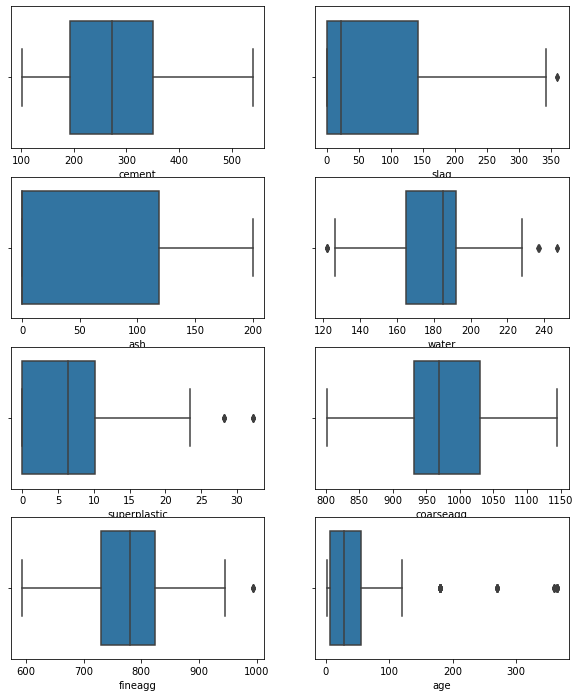

In [8]:
fig , ax  = plt.subplots(4, 2, figsize  = (10 ,12))
sns.boxplot(df.cement, ax  = ax[0,0])
sns.boxplot(df.slag, ax  = ax[0,1])
sns.boxplot(df.ash, ax  = ax[1,0])
sns.boxplot(df.water, ax  = ax[1,1])
sns.boxplot(df.superplastic, ax  = ax[2,0])
sns.boxplot(df.coarseagg, ax  = ax[2,1])
sns.boxplot(df.fineagg, ax  = ax[3,0])
sns.boxplot(df.age, ax  = ax[3,1])


## outlier detection

### cement

In [9]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is :',Q1)
print('1st Quartile (Q3) is :',Q3)

1st Quartile (Q1) is : 192.375
1st Quartile (Q3) is : 350.0


In [10]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('lower outlier limit in cement: ',L_outliers)
print('upper outlier limit in cement: ',U_outliers)


lower outlier limit in cement:  -44.0625
upper outlier limit in cement:  586.4375


In [11]:
#checking the presents of  outlier with upper and lower limits

print('Number of outliers in cement upper :',df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower :',df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper : 0
Number of outliers in cement lower : 0


## water

In [12]:
w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)

print('1st Quartile (w_Q1) is :',w_Q1)
print('1st Quartile (w_Q3) is :',w_Q3)

1st Quartile (w_Q1) is : 164.9
1st Quartile (w_Q3) is : 192.0


In [13]:
L_outliers=w_Q1-1.5*(w_Q3-w_Q1)
U_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('lower outlier limit in cement: ',L_outliers)
print('upper outlier limit in cement: ',U_outliers)


lower outlier limit in cement:  124.25000000000001
upper outlier limit in cement:  232.64999999999998


In [14]:
#checking the presents of  outlier with upper and lower limits

print('Number of outliers in water upper :',df[df['water']>232.64999999999998]['water'].count())
print('Number of outliers in water lower :',df[df['water']<124.25000000000001]['water'].count())

Number of outliers in water upper : 4
Number of outliers in water lower : 5


## slag

In [15]:
s_Q1=df['slag'].quantile(q=0.25)
s_Q3=df['slag'].quantile(q=0.75)

print('1st Quartile (s_Q1) is :',s_Q1)
print('1st Quartile (s_Q3) is :',s_Q3)

1st Quartile (s_Q1) is : 0.0
1st Quartile (s_Q3) is : 142.95


In [16]:
L_outliers=s_Q1-1.5*(s_Q3-s_Q1)
U_outliers=s_Q3+1.5*(s_Q3-s_Q1)

print('lower outlier limit in slag: ',L_outliers)
print('upper outlier limit in slag: ',U_outliers)


lower outlier limit in slag:  -214.42499999999998
upper outlier limit in slag:  357.375


In [17]:
print('Number of outliers in slag upper :',df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower :',df[df['slag']<-214.42499999999998]['slag'].count())

Number of outliers in slag upper : 2
Number of outliers in slag lower : 0


## age

In [18]:
a_Q1=df['age'].quantile(q=0.25)
a_Q3=df['age'].quantile(q=0.75)

print('1st Quartile (a_Q1) is :',a_Q1)
print('1st Quartile (a_Q3) is :',a_Q3)

1st Quartile (a_Q1) is : 7.0
1st Quartile (a_Q3) is : 56.0


In [19]:
L_outliers=a_Q1-1.5*(a_Q3-a_Q1)
U_outliers=a_Q3+1.5*(a_Q3-a_Q1)

print('lower outlier limit in age: ',L_outliers)
print('upper outlier limit in age: ',U_outliers)

lower outlier limit in age:  -66.5
upper outlier limit in age:  129.5


In [20]:
print('Number of outliers in age upper :',df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower :',df[df['age']<-66.5]['age'].count())

Number of outliers in age upper : 59
Number of outliers in age lower : 0


## ash

In [21]:
A_Q1=df['ash'].quantile(q=0.25)
A_Q3=df['ash'].quantile(q=0.75)

print('1st Quartile (a_Q1) is :',A_Q1)
print('1st Quartile (a_Q3) is :',A_Q3)

1st Quartile (a_Q1) is : 0.0
1st Quartile (a_Q3) is : 118.3


In [22]:
L_outliers=A_Q1-1.5*(A_Q3-A_Q1)
U_outliers=A_Q3+1.5*(A_Q3-A_Q1)

print('lower outlier limit in ash: ',L_outliers)
print('upper outlier limit in ash: ',U_outliers)

lower outlier limit in ash:  -177.45
upper outlier limit in ash:  295.75


In [23]:
print('Number of outliers in ash upper :',df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower :',df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper : 0
Number of outliers in ash lower : 0


## super plastic

In [24]:
S_Q1=df['superplastic'].quantile(q=0.25)
S_Q3=df['superplastic'].quantile(q=0.75)

print('1st Quartile (Q1) is :',S_Q1)
print('1st Quartile (Q3) is :',S_Q3)

1st Quartile (Q1) is : 0.0
1st Quartile (Q3) is : 10.2


In [25]:
L_outliers=S_Q1-1.5*(S_Q3-S_Q1)
U_outliers=S_Q3+1.5*(S_Q3-S_Q1)

print('lower outlier limit in superplastic: ',L_outliers)
print('upper outlier limit in superplastic: ',U_outliers)

lower outlier limit in superplastic:  -15.299999999999999
upper outlier limit in superplastic:  25.5


In [26]:
print('Number of outliers superplastic upper :',df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower :',df[df['superplastic']<-15.299999999999999]['superplastic'].count())

Number of outliers superplastic upper : 10
Number of outliers in superplastic lower : 0


## pairplot

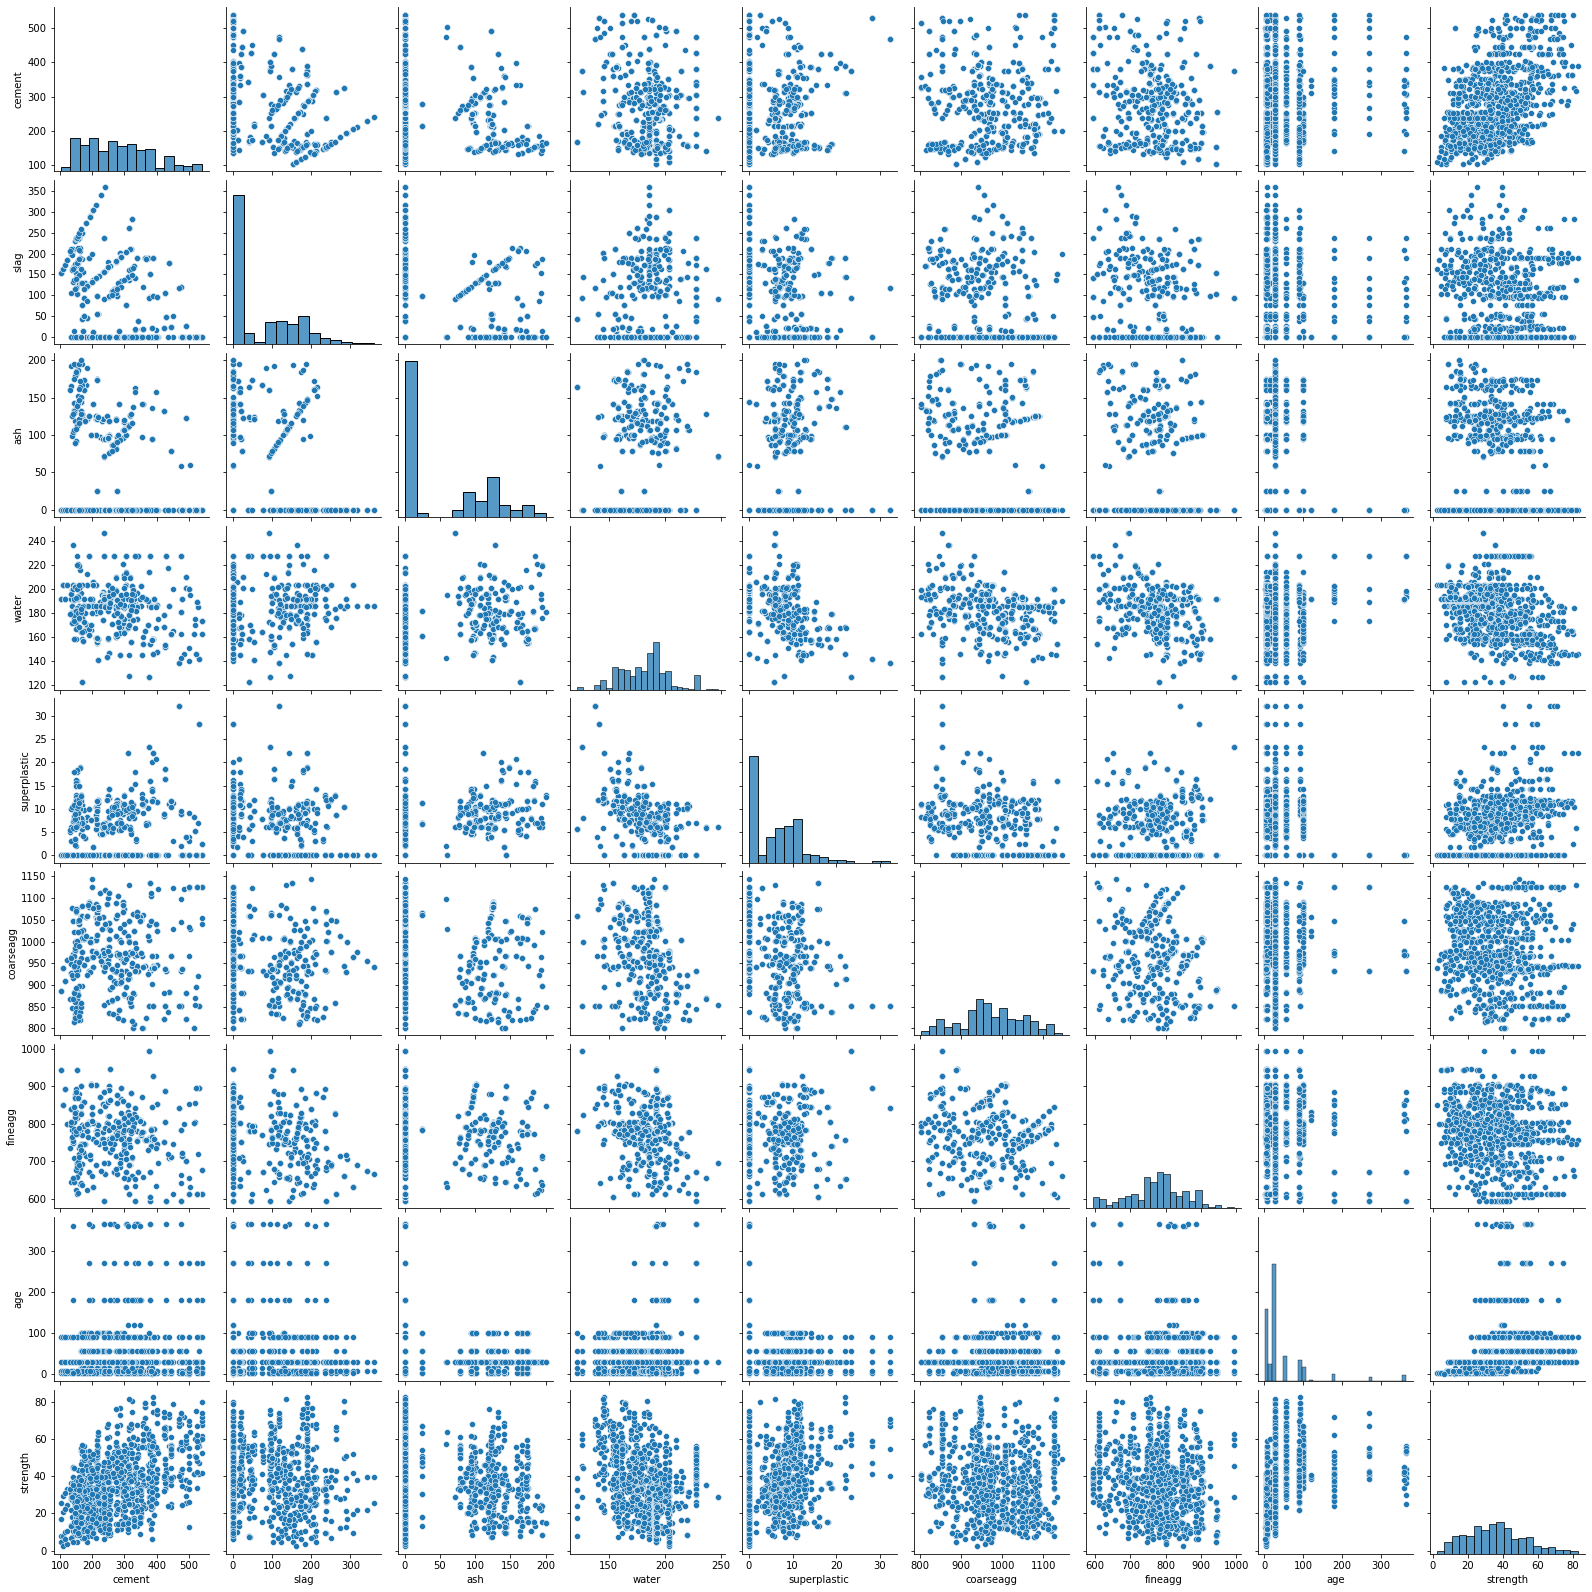

In [27]:
sns.pairplot(df)

## treating outlier

In [28]:
def find_ranges(variable):
    
    q1  = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr  = q3  - q1
    lower_range  =  q1  - 1.5 * iqr
    upper_range  =  q3 + 1.5* iqr
    return lower_range , upper_range

In [29]:
lower_superplastic , upper_superplastic =  find_ranges('superplastic')
lower_slag  , upper_slag   = find_ranges('slag')
lower_water , upper_water =  find_ranges('water')
lower_fineagg , upper_fineagg =  find_ranges('fineagg')
lower_age , upper_age =  find_ranges('age')

In [30]:
df.water =  np.where(df.water > upper_water , upper_water , np.where(
df.water < lower_water , lower_water , df.water
))
df.superplastic =  np.where(df.superplastic > upper_superplastic , upper_superplastic , np.where(
df.superplastic < lower_superplastic , lower_superplastic , df.superplastic
))

df.slag=  np.where(df.slag > upper_slag , upper_slag, np.where(
df.slag < lower_slag , lower_slag , df.slag
))
df.fineagg=  np.where(df.fineagg > upper_fineagg , upper_fineagg, np.where(
df.fineagg < lower_fineagg , lower_fineagg , df.fineagg
))
df.age=  np.where(df.age > upper_age , upper_age, np.where(
df.age < lower_age , lower_age , df.age
))

<AxesSubplot:xlabel='age'>

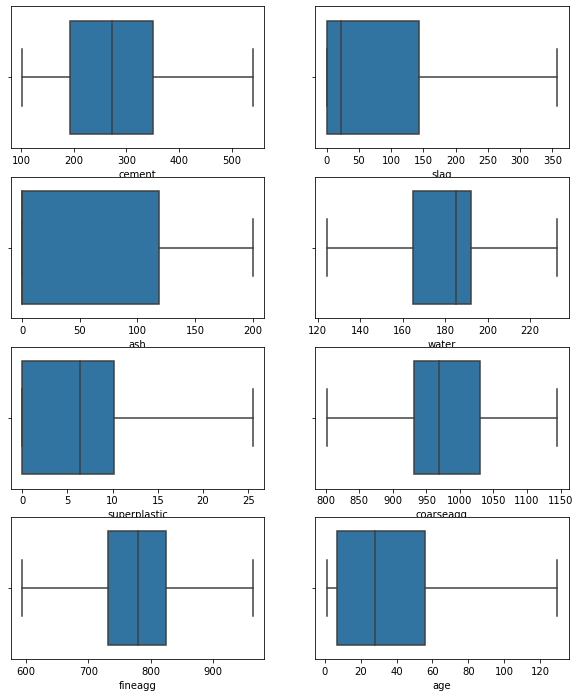

In [31]:
fig , ax  = plt.subplots(4, 2, figsize  = (10 ,12))
sns.boxplot(df.cement, ax  = ax[0,0])
sns.boxplot(df.slag, ax  = ax[0,1])
sns.boxplot(df.ash, ax  = ax[1,0])
sns.boxplot(df.water, ax  = ax[1,1])
sns.boxplot(df.superplastic, ax  = ax[2,0])
sns.boxplot(df.coarseagg, ax  = ax[2,1])
sns.boxplot(df.fineagg, ax  = ax[3,0])
sns.boxplot(df.age, ax  = ax[3,1])


<AxesSubplot:>

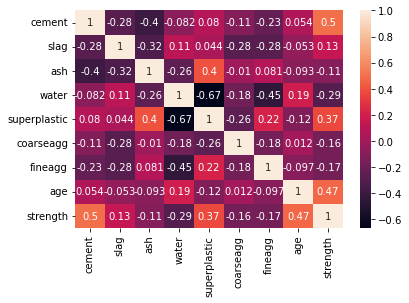

In [32]:
sns.heatmap(df.corr(), annot=True)

In [33]:
def correlation(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(df,0.7)
len(set(corr_features))

0

from the above correlation we get to know that there are no inter correlating features in the data set

In [35]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.30


## splitting datas into independent and dependent variables

In [36]:
x=df.drop('strength',axis=1)
y=df['strength']

In [37]:
from scipy.stats import zscore
xscale=x.apply(zscore)
xscale_df=pd.DataFrame(xscale,columns=df.columns)
xscale_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,2.477915,-0.856971,-0.847144,-0.921211,-0.630906,0.863154,-1.221406,-0.281572,NaN
1,2.477915,-0.856971,-0.847144,-0.921211,-0.630906,1.056164,-1.221406,-0.281572,NaN
2,0.491425,0.795692,-0.847144,2.189833,-1.061968,-0.526517,-2.249277,2.556406,NaN
3,0.491425,0.795692,-0.847144,2.189833,-1.061968,-0.526517,-2.249277,2.556406,NaN
4,-0.790459,0.678556,-0.847144,0.492900,-1.061968,0.070527,0.652578,2.556406,NaN
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488354,0.564545,-0.091599,0.472611,-1.323005,-0.064425,-0.281572,NaN
1026,0.392819,-0.856971,0.960068,0.681448,0.731247,-1.994680,0.500904,-0.281572,NaN
1027,-1.270088,0.759739,0.850635,0.525896,-0.010178,-1.036064,0.082235,-0.281572,NaN
1028,-1.168610,1.308307,-0.847144,-0.280147,0.886429,0.214641,0.193796,-0.281572,NaN


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(xscale, y, test_size=0.3, random_state=1)

## bulding different model

### random forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [41]:
model=RandomForestRegressor()

In [42]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
y_pred=model.predict(x_test)

In [44]:
#model performance on traing data
model.score(x_train,y_train)

0.9845497419336173

In [45]:
# model performabce on test data
model.score(x_test,y_test)

0.8752250575618513

In [46]:
#r2_score
acc_R=r2_score(y_test,y_pred)
acc_R

0.8752250575618513

In [47]:
mean_squared_error(y_test,y_pred)

32.70441066952339

In [48]:
# store the accuracy result for each model in a dataframe for final comparison

result_1=pd.DataFrame({'Algorithm':['Random forest'],'Accuracy': acc_R},index={'1'})
results = result_1[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225


## Kfold

In [49]:
k = 10

kfold = KFold(n_splits=k, random_state=None)
K_results = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7356196339300516

In [50]:
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'Accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620


## KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
diff_k=[]
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

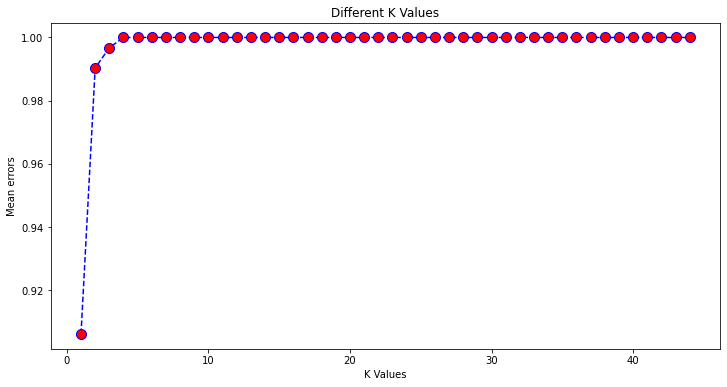

In [53]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [54]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
y_pred=model.predict(x_test)

In [56]:
model.score(x_train, y_train)

0.9012123954737747

In [57]:
acc_KNN=r2_score(y_test, y_pred)
acc_KNN

0.7324054515357681

In [58]:
mean_squared_error(y_test, y_pred)

70.13845756921971

In [59]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'Accuracy': [acc_KNN]}, index={'3'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405


In [60]:
## KFOLD KNN

In [61]:
k = 10

kfold = KFold(n_splits=k, random_state=None)
results_3 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

0.47903448559052614

In [62]:
KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'Accuracy': accuracy},index={'4'})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034


## Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [64]:
y_pred = model.predict(x_test)

In [65]:
model.score(x_train, y_train)

0.9532017902443396

In [66]:
model.score(x_test, y_test)

0.883508036772904

In [67]:
acc_G=r2_score(y_test, y_pred)
acc_G

0.883508036772904

In [68]:
mean_squared_error(y_test, y_pred)

30.533382189028032

In [69]:
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'Accuracy': acc_G},index={'5'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508


## kfold gradient

In [70]:
k = 10

kfold = KFold(n_splits=k, random_state=None)
results_4 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

0.7562081726016573

In [71]:
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'Accuracy': accuracy},index={'6'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208


## Support Vector Regressor

In [72]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [73]:
y_pred = model.predict(x_test)

In [74]:
model.score(x_train, y_train)

0.7464540352203537

In [75]:
acc_SVR=r2_score(y_test, y_pred)
acc_SVR

0.6576628121295447

In [76]:
mean_squared_error(y_test, y_pred)

89.7290414308547

In [77]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'Accuracy': acc_SVR},index={'7'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208
7,Support Vector Regressor,0.657663


## kfold for SVR

In [78]:
k = 10

kfold = KFold(n_splits=k, random_state=None)
results_5 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

0.5586556149664348

In [79]:
SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'Accuracy': accuracy},index={'8'})
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208
7,Support Vector Regressor,0.657663
8,Support Vector Regressor k fold,0.558656


## Desion Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [81]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=x_train.columns))

Feature importance: 
               Importance
cement          0.302179
slag            0.057020
ash             0.010455
water           0.125359
superplastic    0.051738
coarseagg       0.017890
fineagg         0.053022
age             0.382337


 As we can see, Cement, Age and Water are the most important features

In [82]:
y_pred = dec_model.predict(x_test)

In [83]:
dec_model.score(x_train, y_train)

0.9963271613413867

In [84]:
dec_model.score(x_test, y_test)

0.7913385305446288

In [85]:
acc_DT=r2_score(y_test, y_pred)
acc_DT

0.7913385305446288

In [86]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'Accuracy': [acc_DT]},index={'9'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208
7,Support Vector Regressor,0.657663
8,Support Vector Regressor k fold,0.558656
9,Decision Tree Regressor 1,0.791339


## kfold for Decision Tree Regressor

In [87]:
k = 10

kfold = KFold(n_splits=k, random_state=None)
results_6 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_6))
accuracy

0.5586556149664348

In [88]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'Accuracy': accuracy},index={'10'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208
7,Support Vector Regressor,0.657663
8,Support Vector Regressor k fold,0.558656
9,Decision Tree Regressor 1,0.791339
10,Decision Tree Regressor k fold,0.558656


In [89]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [90]:
y_pred = xgr.predict(x_test)

In [91]:
xgr.score(x_train, y_train)

0.9958474698201989

In [92]:
acc_XGB=r2_score(y_test, y_pred)
acc_XGB

0.8993194799117302

In [93]:
mean_squared_error(y_test, y_pred)

26.38908911555038

In [94]:
xgr.score(x_test, y_test)

0.8993194799117302

In [95]:
XGB_df = pd.DataFrame({'Algorithm': ['XGboost'], 'Accuracy': [acc_XGB]},index={'11'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random forest,0.875225
2,Random Forest Regressor k_fold,0.735620
3,KNN Regressor,0.732405
4,KNN Regressor k fold,0.479034
5,Gradient Boost Regressor,0.883508
6,Gradient Boost Regressor k fold,0.756208
7,Support Vector Regressor,0.657663
8,Support Vector Regressor k fold,0.558656
9,Decision Tree Regressor 1,0.791339
10,Decision Tree Regressor k fold,0.558656


([<matplotlib.patches.Wedge at 0x1a5dbd7b910>,
 [Text(0.9213693224329694, 0.6008981375236663, 'Random Forest Regressor k_fold'),
  Text(0.04125754262928415, 1.0992260073234226, 'KNN Regressor k fold'),
  Text(-0.8864334231490276, 0.6513338516646414, 'Gradient Boost Regressor k fold'),
  Text(-1.0115863985858238, -0.43207980535563434, 'Support Vector Regressor k fold'),
  Text(-0.3110706430072334, -1.0550995474641558, 'Decision Tree Regressor k fold'),
  Text(0.8351689172107035, -0.7158860801308413, 'XGboost')],
 [Text(0.5025650849634379, 0.3277626204674543, '18%'),
  Text(0.022504114161427714, 0.5995778221764122, '12%'),
  Text(-0.48350913989946953, 0.3552730099988953, '19%'),
  Text(-0.5517743992286311, -0.235679893830346, '14%'),
  Text(-0.16967489618576365, -0.5755088440713577, '14%'),
  Text(0.45554668211492916, -0.3904833164350043, '23%')])

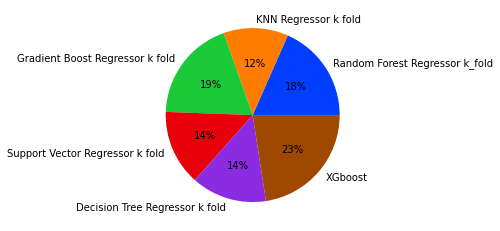

In [97]:
data=[0.733402,0.479034,0.757829,0.558656,0.558656,0.899319]
keys=['Random Forest Regressor k_fold','KNN Regressor k fold','Gradient Boost Regressor k fold','Support Vector Regressor k fold','Decision Tree Regressor k fold','XGboost']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  

## Inferences from Data Visualization:


1. The given data set has no missing values.
2. after doing the boxplot,and get to know that some features(age,superplastic,water,slag) are haveing outliers.
3. By using IQR method all outliers are cleared.
4. Ploting of pairplot let us  know that linear regression and logestic regression can not be used  due to overlaping of data,      hence we moved on with other unsupervised algorithms
5. we have plotted all features in heatmap giving a threshold value of 0.7, and get know that there is no high correlation          between features
6. scaled datas using zscore


## Here we have checked six different models
## Final Conclusion of Given data sets

## XGboost,Gradient Boost Regressor,Random forest model are having high accuracy score. among this XGboost having high accuracy of 0.89